In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df_up_up = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_up_deltaN_up.txt', sep="\t", header=0, index_col=0)
df_up_down = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_up_deltaN_down.txt', sep="\t", header=0, index_col=0)
df_down_up = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_down_deltaN_up.txt', sep="\t", header=0, index_col=0)
df_down_down = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_down_deltaN_down.txt', sep="\t", header=0, index_col=0)

In [18]:
df_nuc = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/Nuclear_AGO1_targets.txt', header=0, index_col=0, sep="\t", skiprows=1)
df_nuc = df_nuc.dropna()

In [19]:
df_nuc

,Chromosome,Start,End,Relative ChIP signala (RPKM),Unnamed: 5,Unnamed: 6,Normalized ChIP signal (RPKM),Unnamed: 8,Unnamed: 9,Associated genes,...,Unnamed: 15,GRO-seq (RPKM),Unnamed: 17,PolII (RPKM),Unnamed: 19,PolII_Ser2P (RPKM),Unnamed: 21,PolII_Ser5P (RPKM),Unnamed: 23,Nuclear AGO1-bound sRNAs (RPKM)
Peak ID,,,,,,,,,,,,,,,,,,,,,
AGO1_peak_1,Chr1,77534.0,77849.0,-0.35,3.32,6.93,10.36,12.49,12.72,At1g01180_downstream_1k,...,0.09,2.18,0.55,20.74,13.82,14.73,10.98,18.15,11.34,1.42
AGO1_peak_2,Chr1,128098.0,128707.0,-3.03,3.32,9.09,13.34,13.98,12.99,At1g01320,...,0.60,19.47,5.18,12.10,8.88,38.00,22.74,42.28,22.58,2.81
AGO1_peak_4,Chr1,146097.0,146381.0,-4.33,5.9,7.02,14.83,9.68,12.62,At1g01370_downstream_1k;At1g01380_promoter_1k,...,0.73,0.36,0.17,6.47,6.95,6.71,6.01,6.40,6.16,0.00
AGO1_peak_5,Chr1,156185.0,157294.0,-0.32,3.9,6.65,14.82,13.99,13.98,At1g01420_promoter_1k;At1g01430_downstream_1k,...,0.00,1.93,0.44,20.38,11.35,11.56,8.23,15.28,6.90,2.38
AGO1_peak_6,Chr1,225315.0,227284.0,-2.76,6.95,9.41,16.39,14.78,18.15,At1g01620,...,0.00,24.31,5.72,77.69,31.06,41.27,23.77,67.34,39.18,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGO1_peak_935,Chr5,26833344.0,26833514.0,-7.83,1.66,9.1,8.72,12.36,8.68,At5g67250_promoter_1k,...,0.31,4.28,1.90,26.04,35.86,21.98,31.07,32.39,37.43,4.12
AGO1_peak_936,Chr5,26876261.0,26876854.0,0.16,5.89,6.98,13.4,13.36,11.38,At5g67370_downstream_1k,...,0.97,2.47,0.56,11.81,9.80,13.31,7.90,13.79,7.64,0.56
AGO1_peak_937,Chr5,26879255.0,26879523.0,-4.34,7.82,3.91,17.93,17.09,16.92,At5g67370,...,0.97,2.47,0.56,11.81,9.80,13.31,7.90,13.79,7.64,0.56


In [61]:
nuc_genes = [f"gene:{g.upper()}" for g in df_nuc["Gene ID"].values]

In [53]:
up_up_nuc = np.intersect1d(nuc_genes, df_up_up.index)
up_down_nuc = np.intersect1d(nuc_genes, df_up_down.index)
down_up_nuc = np.intersect1d(nuc_genes, df_down_up.index)
down_down_nuc = np.intersect1d(nuc_genes, df_down_down.index)

In [54]:
len(nuc_genes)

749

In [41]:
print(len(up_up_nuc)/len(df_up_up))
up_up_nuc

0.08695652173913043


array(['gene:AT3G24480', 'gene:AT5G64570'], dtype=object)

In [43]:
print(len(up_down_nuc)/len(df_up_down))
up_down_nuc

0.0


array([], dtype=object)

In [44]:
print(len(down_up_nuc)/len(df_down_up))
down_up_nuc

0.22580645161290322


array(['gene:AT1G01620', 'gene:AT1G11260', 'gene:AT3G16240',
       'gene:AT3G47340', 'gene:AT4G02130', 'gene:AT4G18670',
       'gene:AT5G51550'], dtype=object)

In [45]:
print(len(down_down_nuc)/len(df_down_down))
down_down_nuc

0.06060606060606061


array(['gene:AT1G68840', 'gene:AT1G75450', 'gene:AT2G39650',
       'gene:AT4G17460', 'gene:AT4G19170', 'gene:AT5G61440'], dtype=object)

In [46]:
df_deltaN_up = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/upregulated/gene/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)
df_deltaN_down = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/downregulated/gene/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)

In [104]:
df_cyt = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/upregulated/gene/DEG_WT_AGO1_ago1_0.05_0_BH.csv', sep="\t", header=0, index_col=0)
cyt_genes = df_cyt.index

In [109]:
up_nuc = np.intersect1d(nuc_genes, df_deltaN_up.index)
print("up nuc")
print(len(up_nuc)/len(df_deltaN_up))
print(up_nuc)

down_nuc = np.intersect1d(nuc_genes, df_deltaN_down.index)
print("\n")
print("down nuc")
print(len(down_nuc)/len(df_deltaN_down))
print(down_nuc)

up nuc
0.2
['gene:AT1G01620' 'gene:AT1G11260' 'gene:AT1G23090' 'gene:AT1G62480'
 'gene:AT2G19800' 'gene:AT2G45680' 'gene:AT3G16240' 'gene:AT3G24480'
 'gene:AT3G47340' 'gene:AT4G02130' 'gene:AT4G18670' 'gene:AT5G15410'
 'gene:AT5G51550' 'gene:AT5G64570']


down nuc
0.03614457831325301
['gene:AT1G68840' 'gene:AT1G75450' 'gene:AT2G39650' 'gene:AT4G17460'
 'gene:AT4G19170' 'gene:AT5G61440']


In [108]:
up_cyt = np.intersect1d(cyt_genes, df_deltaN_up.index)
print("\n")
print("up cyt")
print(len(up_cyt)/len(df_deltaN_down))
print(up_cyt)

down_cyt = np.intersect1d(cyt_genes, df_deltaN_down.index)
print("\n")
print("down cyt")
print(len(down_cyt)/len(df_deltaN_down))
print(down_cyt)



up cyt
0.13855421686746988
['gene:AT1G75750' 'gene:AT1G76160' 'gene:AT2G23120' 'gene:AT2G27380'
 'gene:AT2G43150' 'gene:AT3G24480' 'gene:AT3G44300' 'gene:AT3G58620'
 'gene:AT3G62150' 'gene:AT4G02380' 'gene:AT4G02420' 'gene:AT4G25140'
 'gene:AT4G28520' 'gene:AT4G30270' 'gene:AT4G33720' 'gene:AT5G07440'
 'gene:AT5G09440' 'gene:AT5G11090' 'gene:AT5G14920' 'gene:AT5G24030'
 'gene:AT5G26200' 'gene:AT5G64570' 'gene:ATCG00170']


down cyt
0.1566265060240964
['gene:AT1G02205' 'gene:AT1G16410' 'gene:AT1G18570' 'gene:AT1G18590'
 'gene:AT1G23205' 'gene:AT1G64950' 'gene:AT1G68570' 'gene:AT2G05510'
 'gene:AT2G17040' 'gene:AT2G41410' 'gene:AT3G22160' 'gene:AT3G46620'
 'gene:AT3G50770' 'gene:AT3G50930' 'gene:AT4G02410' 'gene:AT4G15550'
 'gene:AT4G23680' 'gene:AT4G23810' 'gene:AT4G26850' 'gene:AT4G31550'
 'gene:AT4G33050' 'gene:AT4G39950' 'gene:AT5G08790' 'gene:AT5G24210'
 'gene:AT5G39050' 'gene:AT5G42050']


In [99]:
df_deltaN_down

,WT_AGO1.1,WT_AGO1.2,deltaN.1,deltaN.2,baseMean,log2FC,lfcSE,stat,p.value,q.value,q.value_BH,ranking
gene:AT1G02205,1158,1333,705,901,1018.349872,-0.665494,0.161961,-4.108967,3.974322e-05,5.759335e-03,7.819835e-03,140.0
gene:AT1G04770,764,916,283,188,538.822772,-1.834265,0.258425,-7.097872,1.266925e-12,1.358144e-09,1.844043e-09,19.0
gene:AT1G05680,2317,2314,1538,1118,1832.963339,-0.814281,0.220609,-3.691058,2.233230e-04,2.317085e-02,3.146062e-02,196.0
gene:AT1G06040,677,678,432,348,536.272160,-0.814814,0.231070,-3.526258,4.214759e-04,3.637551e-02,4.938948e-02,236.0
gene:AT1G10640,449,420,227,247,336.714132,-0.910570,0.232186,-3.921731,8.791525e-05,1.098563e-02,1.491593e-02,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...
gene:AT5G59450,739,865,471,473,635.428561,-0.784728,0.183834,-4.268673,1.966392e-05,3.160153e-03,4.290751e-03,126.0
gene:AT5G59820,663,768,231,159,456.549132,-1.879333,0.258229,-7.277776,3.393676e-13,4.608159e-10,6.256807e-10,15.0
gene:AT5G61440,1659,2039,1210,1323,1549.304299,-0.566825,0.148183,-3.825163,1.306855e-04,1.506309e-02,2.045217e-02,176.0
gene:AT5G61600,4165,4259,637,756,2465.466994,-2.632075,0.152832,-17.222065,1.814002e-66,3.694759e-62,5.016622e-62,1.0


In [98]:
df_deltaN_up

,WT_AGO1.1,WT_AGO1.2,deltaN.1,deltaN.2,baseMean,log2FC,lfcSE,stat,p.value,q.value,q.value_BH,ranking
gene:AT1G01620,4857,5545,6603,7948,6184.169545,0.454169,0.128787,3.526518,0.000421,0.036376,0.049389,235.0
gene:AT1G03090,2229,2130,4100,3323,2952.074222,0.748096,0.199310,3.753439,0.000174,0.019174,0.026034,185.0
gene:AT1G09570,2229,2480,3446,3801,2968.701616,0.594974,0.137944,4.313147,0.000016,0.002755,0.003740,119.0
gene:AT1G11260,12836,12693,20755,19790,16489.884599,0.640948,0.159409,4.020773,0.000058,0.007824,0.010624,151.0
gene:AT1G14290,268,312,419,632,401.457587,0.818050,0.224016,3.651749,0.000260,0.025753,0.034966,206.0
...,...,...,...,...,...,...,...,...,...,...,...,...
gene:AT5G52882,944,1194,1351,2210,1399.169239,0.696347,0.195440,3.562972,0.000367,0.033779,0.045863,221.0
gene:AT5G60850,368,383,618,683,509.756654,0.762387,0.193775,3.934403,0.000083,0.010486,0.014238,162.0
gene:AT5G64570,2017,1860,2779,3756,2579.973479,0.704681,0.174284,4.043288,0.000053,0.007254,0.009849,148.0
gene:AT5G65730,1235,1316,1740,3021,1796.049304,0.847438,0.205173,4.130355,0.000036,0.005331,0.007238,138.0


In [49]:
df_fC = pd.read_csv(f'/Users/siomi19/Desktop/AtAgo1 RNA-seq/featureCounts/results/AtAgo1_RNA-seq_featureCounts_gene.txt',
                        skiprows=1,
                        sep="\t",
                        header=0,
                        index_col=0,
                        usecols=[0,6,7,8,9,10,11,12,13]
                        )

In [50]:
df_deltaN_lfc = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/AtAgo1_RNA-seq_featureCounts_gene_WT_AGO1_deltaN_DESeq2.txt', header=0, index_col=0, sep="\t")

In [56]:
df_deltaN_lfc

,WT_AGO1.1,WT_AGO1.2,deltaN.1,deltaN.2,baseMean,log2FC,lfcSE,stat,p.value,q.value,q.value_BH,ranking
gene:AT1G01010,117,165,151,200,156.046983,0.292469,0.294014,0.994747,0.319859,0.999600,1.000000,6502.0
gene:AT1G01020,147,164,141,188,158.614726,0.045916,0.286582,0.160220,0.872708,0.999600,1.000000,20406.0
gene:AT1G01030,59,100,119,76,88.261956,0.314477,0.431269,0.729191,0.465885,0.999600,1.000000,9720.0
gene:AT1G01040,710,771,731,969,788.464978,0.161664,0.176795,0.914415,0.360499,0.999600,1.000000,7388.0
gene:AT1G01050,673,856,688,899,770.528692,0.025883,0.175223,0.147715,0.882568,0.999600,1.000000,20630.0
...,...,...,...,...,...,...,...,...,...,...,...,...
gene:ATCG01250,251,257,646,293,366.749853,0.898662,0.654568,1.372909,0.169781,0.999600,1.000000,3589.0
gene:ATCG01270,1,9,6,7,5.550351,0.423755,1.455906,0.291060,0.771006,1.000000,1.000000,17680.0
gene:ATCG01280,87,153,286,147,168.792625,0.885631,0.402920,2.198034,0.027947,0.517942,0.688829,1122.0
gene:ATCG01300,727,704,685,749,715.018615,-0.031275,0.187194,-0.167070,0.867315,0.999600,1.000000,20264.0


In [65]:
nuc_genes.remove('gene:AT1G22767')
nuc_genes.remove('gene:AT5G19729')

In [85]:
nuc = df_deltaN_lfc_nuc["log2FC"].dropna().values
cyt = df_deltaN_lfc_cyt["log2FC"].dropna().values

In [112]:
np.intersect1d(nuc_genes, df_cyt.index)

array(['gene:AT1G05180', 'gene:AT1G07020', 'gene:AT1G20380',
       'gene:AT1G21050', 'gene:AT1G35560', 'gene:AT1G46480',
       'gene:AT1G49410', 'gene:AT1G50050', 'gene:AT1G51650',
       'gene:AT1G74020', 'gene:AT2G02100', 'gene:AT2G05380',
       'gene:AT2G29630', 'gene:AT2G34070', 'gene:AT2G43140',
       'gene:AT2G45300', 'gene:AT3G03150', 'gene:AT3G05910',
       'gene:AT3G17520', 'gene:AT3G22120', 'gene:AT3G22200',
       'gene:AT3G24480', 'gene:AT3G26180', 'gene:AT3G52180',
       'gene:AT3G57630', 'gene:AT3G61440', 'gene:AT3G63150',
       'gene:AT4G01480', 'gene:AT4G12300', 'gene:AT4G17430',
       'gene:AT4G23850', 'gene:AT4G25100', 'gene:AT4G30340',
       'gene:AT4G31890', 'gene:AT4G33150', 'gene:AT4G39080',
       'gene:AT5G06970', 'gene:AT5G08630', 'gene:AT5G12890',
       'gene:AT5G13550', 'gene:AT5G14780', 'gene:AT5G19730',
       'gene:AT5G20620', 'gene:AT5G20690', 'gene:AT5G36160',
       'gene:AT5G41790', 'gene:AT5G44580', 'gene:AT5G52780',
       'gene:AT5G58710',

In [114]:
nuc_cyt = np.setdiff1d(df_cyt.index, nuc_genes)

In [115]:
df_deltaN_lfc_nuc = df_deltaN_lfc.loc[nuc_genes]
df_deltaN_lfc_cyt = df_deltaN_lfc.loc[nuc_cyt]

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fcb28c1bc40>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fcb29afdb20>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fcb29ae04f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fcb29ae0850>}

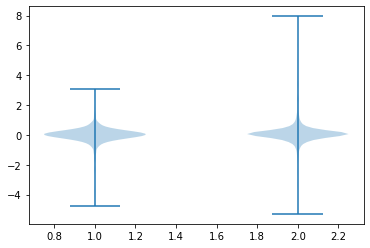

In [116]:
plt.violinplot([df_deltaN_lfc_nuc["log2FC"].dropna().values, df_deltaN_lfc_cyt["log2FC"].dropna().values])
# plt.boxplot([df_deltaN_lfc_nuc["log2FC"].dropna().values, df_deltaN_lfc_cyt["log2FC"].dropna().values])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb25d359d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb25e0b130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb25d35640>,
 'medians': [<matplotlib.lines.Line2D at 0x7fcb25e0b850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb25e0bbe0>,
 'means': []}

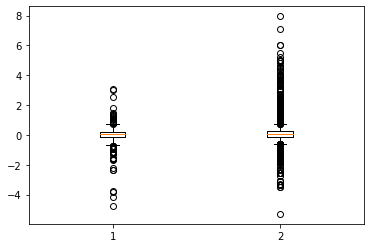

In [117]:
plt.boxplot([df_deltaN_lfc_nuc["log2FC"].dropna().values, df_deltaN_lfc_cyt["log2FC"].dropna().values])

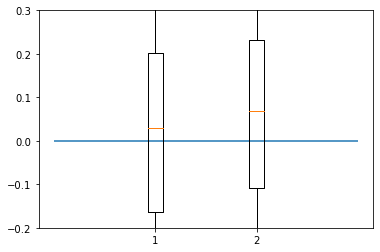

In [125]:
plt.boxplot([df_deltaN_lfc_nuc["log2FC"].dropna().values, df_deltaN_lfc_cyt["log2FC"].dropna().values], sym="")
plt.ylim(-0.2,0.3)
plt.hlines(0, 0, 3)

In [87]:
A_var = np.var(nuc, ddof=1)  # Aの不偏分散
B_var = np.var(cyt, ddof=1)  # Bの不偏分散
A_df = len(nuc) - 1  # Aの自由度
B_df = len(cyt) - 1  # Bの自由度
f = A_var / B_var  # F比の値
one_sided_pval1 = stats.f.cdf(f, A_df, B_df)  # 片側検定のp値 1
one_sided_pval2 = stats.f.sf(f, A_df, B_df)   # 片側検定のp値 2
two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

print('F:       ', round(f, 3))
print('p-value: ', round(two_sided_pval, 3))

F:        0.584
p-value:  0.0


In [88]:
stats.ttest_ind(nuc, cyt, equal_var=False)

Ttest_indResult(statistic=-5.356286312774231, pvalue=1.0081809519010672e-07)